In [1]:
import yaml
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import re
import os
import yaml
# libraries
import numpy as np
from os.path import expanduser
import numpy as np
import numpy.linalg as la
 
#@xl_func("numpy_row v1, numpy_row v2: float")
def py_ang(v1, v2):
    """ Returns the angle in degree between vectors 'v1' and 'v2'    """
    cosang = np.dot(v1, v2)
    sinang = la.norm(np.cross(v1, v2))
    return np.degrees(np.arctan2(sinang, cosang))

In [19]:
directory = expanduser("~/results")
with open(directory + "/" + "parcour.yaml", "r") as file:
            results = yaml.safe_load(file)
with open(directory + "/" + "A61.yaml", "r") as file:
            task = yaml.safe_load(file)

In [20]:
print(task['pivot_points'])
pivots = []
for pp in task['pivot_points']:
    pivots.append(pp['pathindex'])
    print(pp['pathindex'])

[{'pathindex': 0, 'direction': 'FRONT', 'pathdifficulty': 'LINE1'}, {'pathindex': 44, 'direction': 'FRONT', 'pathdifficulty': 'TURNING1'}, {'pathindex': 67, 'direction': 'FRONT', 'pathdifficulty': 'TURNING2'}, {'pathindex': 275, 'direction': 'FRONT', 'pathdifficulty': 'TURNING1'}, {'pathindex': 299, 'direction': 'FRONT', 'pathdifficulty': 'LINE1'}, {'pathindex': 358, 'direction': 'FRONT', 'pathdifficulty': 'TURNING1'}, {'pathindex': 406, 'direction': 'FRONT', 'pathdifficulty': 'TURNING2'}, {'pathindex': 450, 'direction': 'FRONT', 'pathdifficulty': 'TURNING1'}, {'pathindex': 521, 'direction': 'END', 'pathdifficulty': 'END'}]
0
44
67
275
299
358
406
450
521


In [21]:
resultsx = results["path"]
#print(resultsx)
print(resultsx["point28"])
print(resultsx["point40"])
print(resultsx["point30"])

{'x': 1.8312690385737378, 'y': -0.022020004685909447, 'z': 0.0}
{'x': 2.4372680156490127, 'y': -0.014275485905377416, 'z': 0.0}
{'x': 1.931658329751674, 'y': -0.021904918855016085, 'z': 0.0}


In [22]:
del resultsx["path_name"]
del resultsx["pivot_points"]
listx = resultsx["points"]
del resultsx["points"]

In [23]:
print(resultsx)

{'point0': {'x': 0.42581896208263315, 'y': -0.02363120631841653, 'z': 0.0}, 'point1': {'x': 0.47601360767160117, 'y': -0.02357366340296985, 'z': 0.0}, 'point10': {'x': 0.9277654179723134, 'y': -0.023055777163949714, 'z': 0.0}, 'point100': {'x': 1.6046903636747332, 'y': 1.639106164854313, 'z': 0.0}, 'point101': {'x': 1.5640942706456742, 'y': 1.6683301039961684, 'z': 0.0}, 'point102': {'x': 1.5234981776166152, 'y': 1.697554043138024, 'z': 0.0}, 'point103': {'x': 1.4829020845875562, 'y': 1.7267779822798794, 'z': 0.0}, 'point104': {'x': 1.442305991558497, 'y': 1.7560019214217353, 'z': 0.0}, 'point105': {'x': 1.401709898529438, 'y': 1.7852258605635907, 'z': 0.0}, 'point106': {'x': 1.361113805500379, 'y': 1.8144497997054463, 'z': 0.0}, 'point107': {'x': 1.32051771247132, 'y': 1.8436737388473017, 'z': 0.0}, 'point108': {'x': 1.2799216194422613, 'y': 1.8728976779891573, 'z': 0.0}, 'point109': {'x': 1.2393255264132024, 'y': 1.902121617131013, 'z': 0.0}, 'point11': {'x': 0.9779600635612814, 'y':

In [24]:
point_array = []
for point in listx:
    point_array.append([resultsx[point]['x'],resultsx[point]['y']])


In [25]:
print(point_array)

[[0.42581896208263315, -0.02363120631841653], [0.47601360767160117, -0.02357366340296985], [0.5262082532605692, -0.02351612048752317], [0.5764028988495372, -0.023458577572076485], [0.6265975444385052, -0.023401034656629804], [0.6767921900274733, -0.023343491741183123], [0.7269868356164413, -0.023285948825736442], [0.7771814812054093, -0.02322840591028976], [0.8273761267943773, -0.02317086299484308], [0.8775707723833455, -0.023113320079396395], [0.9277654179723134, -0.023055777163949714], [0.9779600635612814, -0.022998234248503033], [1.0281547091502494, -0.022940691333056352], [1.0783493547392173, -0.02288314841760967], [1.1285440003281855, -0.02282560550216299], [1.1787386459171536, -0.022768062586716306], [1.2289332915061215, -0.022710519671269625], [1.2791279370950897, -0.022652976755822944], [1.3293225826840578, -0.022595433840376263], [1.3795172282730257, -0.022537890924929582], [1.4297118738619936, -0.022480348009482898], [1.4799065194509617, -0.022422805094036217], [1.53010116503

In [26]:
list_x = []
for x in range(0, len(point_array) - 1):
    list_x.append(np.array([point_array[x][0] - point_array[x + 1][0], point_array[x][1] - point_array[x + 1][1]]))


No handles with labels found to put in legend.


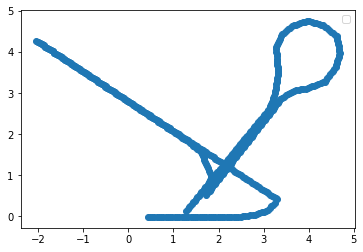

<Figure size 1440x720 with 0 Axes>

In [27]:
data = np.array(point_array)
x,y = data.T
plt.scatter(x,y)
plt.legend()
plt.figure(figsize=(20,10))
plt.show()

In [71]:
ang_list_local = []
points = []
pivots = [0]
x1 = 0
print(len(list_x))
for x in range(0, len(list_x) - 1):
    ang_list_local.append(180.0 - py_ang(list_x[x], list_x[x + 1]))
    if (py_ang(list_x[x], list_x[x + 1]) > 10.0):
        if (x - 6 > pivots[x1]):
            pivots.append(x) 
            x1 += 1
        #pivots.append(x - 6)
        for p in range(0,11):
            points.append(point_array[x + p - 4])
        print(str(x) +" :"+ str(180.0 - py_ang(list_x[x], list_x[x + 1])))
pivots.append(len(list_x) - 1)
print(pivots)

521
46 :164.25451557255022
52 :156.4277044276309
56 :169.14320543945215
57 :93.44556629929944
189 :0.19707146771423822
279 :154.22352645888165
290 :159.36255822287737
295 :156.46922956560195
299 :8.376484848232792
356 :157.91543711353748
362 :158.7574747367475
368 :167.72813414318676
376 :148.1942217693535
384 :159.7750872575512
391 :155.52620581244759
399 :142.17982582028725
406 :154.60593286679648
413 :142.73008683668596
420 :156.91223130662343
425 :156.78973812669602
431 :154.7784945872749
442 :166.89956476853934
459 :160.88447096432856
[0, 46, 56, 189, 279, 290, 299, 356, 368, 376, 384, 391, 399, 406, 413, 420, 431, 442, 459, 520]


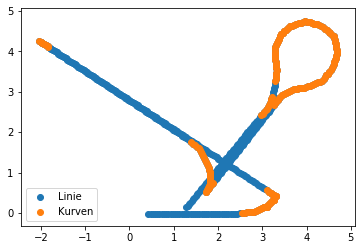

<Figure size 1440x720 with 0 Axes>

In [72]:
data = np.array(points)
data2 = np.array(point_array)
x,y = data.T
x2,y2 = data2.T
plt.scatter(x2,y2, label = "Linie")
plt.scatter(x,y, label = "Kurven")
plt.legend()
plt.figure(figsize=(20,10))
plt.show()

In [73]:
ang_list_global = []
list_global_s = []
list_global_e = []
#pivots = [0,28,44,56,68,120,136,156,186]
start = 0
print(pivots)
for x in range(520):
    if x == pivots[start]:
        start += 1
    
    print("x: " + str(x) + " next: " + str(pivots[start]) + " prev: " + str(pivots[start - 1]))
    list_global_s.append(np.array([point_array[pivots[start - 1]][0] - point_array[x][0], point_array[pivots[start - 1]][1] - point_array[x][1]]))
    list_global_e.append(np.array([point_array[x][0] - point_array[pivots[start]][0], point_array[x][1] - point_array[pivots[start]][1]]))
    print("x: " + str(x) + " first: " + str(np.array([point_array[pivots[start - 1]][0] - point_array[x][0], point_array[pivots[start - 1]][1] - point_array[x][1]])) + " 2nd: " + str(np.array([point_array[x][0] - point_array[pivots[start]][0], point_array[x][1] - point_array[pivots[start]][1]])))
    print("x: " + str(x) + " ang: " + str(180 - py_ang(np.array([point_array[pivots[start - 1]][0] - point_array[x][0], point_array[pivots[start - 1]][1] - point_array[x][1]]), np.array([point_array[x][0] - point_array[pivots[start]][0], point_array[x][1] - point_array[pivots[start]][1]]))))
    ang_list_global.append(max(180 - py_ang(list_global_s[x], list_global_e[x]), py_ang(list_global_s[x], list_global_e[x])))
    

[0, 46, 56, 189, 279, 290, 299, 356, 368, 376, 384, 391, 399, 406, 413, 420, 431, 442, 459, 520]
x: 0 next: 46 prev: 0
x: 0 first: [0. 0.] 2nd: [-2.33459631 -0.052025  ]
x: 0 ang: 180.0
x: 1 next: 46 prev: 0
x: 1 first: [-5.01946456e-02 -5.75429154e-05] 2nd: [-2.28440166 -0.05196746]
x: 1 ang: 178.76249660225892
x: 2 next: 46 prev: 0
x: 2 first: [-0.10038929 -0.00011509] 2nd: [-2.23420702 -0.05190991]
x: 2 ang: 178.73470396708478
x: 3 next: 46 prev: 0
x: 3 first: [-0.15058394 -0.00017263] 2nd: [-2.18401237 -0.05185237]
x: 3 ang: 178.7056344991552
x: 4 next: 46 prev: 0
x: 4 first: [-0.20077858 -0.00023017] 2nd: [-2.13381772 -0.05179483]
x: 4 ang: 178.67519815659102
x: 5 next: 46 prev: 0
x: 5 first: [-0.25097323 -0.00028771] 2nd: [-2.08362308 -0.05173729]
x: 5 ang: 178.6432962290272
x: 6 next: 46 prev: 0
x: 6 first: [-0.30116787 -0.00034526] 2nd: [-2.03342843 -0.05167974]
x: 6 ang: 178.60982026893416
x: 7 next: 46 prev: 0
x: 7 first: [-0.35136252 -0.0004028 ] 2nd: [-1.98323379 -0.0516222

x: 302 first: [-0.04949298 -0.05781868] 2nd: [-1.57529702 -2.21303293]
x: 302 ang: 174.88066182763745
x: 303 next: 356 prev: 299
x: 303 first: [-0.07866515 -0.09880077] 2nd: [-1.54612485 -2.17205084]
x: 303 ang: 176.91750183778646
x: 304 next: 356 prev: 299
x: 304 first: [-0.10783731 -0.13978286] 2nd: [-1.51695269 -2.13106875]
x: 304 ang: 177.79543631205593
x: 305 next: 356 prev: 299
x: 305 first: [-0.13700948 -0.18076496] 2nd: [-1.48778052 -2.09008666]
x: 305 ang: 178.2842524654782
x: 306 next: 356 prev: 299
x: 306 first: [-0.16618165 -0.22174705] 2nd: [-1.45860835 -2.04910457]
x: 306 ang: 178.595675612166
x: 307 next: 356 prev: 299
x: 307 first: [-0.19535381 -0.26272914] 2nd: [-1.42943619 -2.00812248]
x: 307 ang: 178.81142801576652
x: 308 next: 356 prev: 299
x: 308 first: [-0.22452598 -0.30371123] 2nd: [-1.40026402 -1.96714039]
x: 308 ang: 178.96972131322568
x: 309 next: 356 prev: 299
x: 309 first: [-0.25369815 -0.34469332] 2nd: [-1.37109185 -1.9261583 ]
x: 309 ang: 179.0908101996520

In [74]:
print(py_ang([ 0.0965917 , -0.11927856], [-0.12878893,  0.15903808]))
print(len(ang_list_global))
print(len(ang_list_local))

179.9999992747313
520
520


In [92]:
#pivots = [0,28,44,56,68,120,136,156,186]
#start = 0
point_array_line = []
point_array_turn = []
point_array_turn2 = []
print(py_ang(np.array([0,1]),np.array([1,0])))
task["path_points_difficulty"] = {}
for x in range(0,520):
    if ( 0.5 * ang_list_local[x] + ang_list_global[x] * 0.5) > 178.0:
        print(str(x) + " : LINE")
        point_array_line.append(point_array[x])
        task["path_points_difficulty"]["point" + str(x)] = "LINE1"
    if (( 0.5 * ang_list_local[x] + ang_list_global[x] * 0.5) > 170.0 and (( 0.4 * ang_list_local[x] + ang_list_global[x] * 0.6) <= 178.0)):
        print(str(x) + " : TURN1")
        point_array_turn.append(point_array[x])
        task["path_points_difficulty"]["point" + str(x)] = "TURNING1"
    if ( 0.5 * ang_list_local[x] + ang_list_global[x] * 0.5) <= 170.0:
        point_array_turn2.append(point_array[x])
        task["path_points_difficulty"]["point" + str(x)] = "TURNING2"
        print(str(x) + " : TURN2")
    print(str(x) + " : " + str( 0.4 * ang_list_local[x] + ang_list_global[x] * 0.6))

90.0
0 : LINE
0 : 180.0
1 : LINE
1 : 179.25749796135534
2 : LINE
2 : 179.24082238025085
3 : LINE
3 : 179.22338069949313
4 : LINE
4 : 179.2051188939546
5 : LINE
5 : 179.1859777374163
6 : LINE
6 : 179.1658921613605
7 : LINE
7 : 179.1447905165258
8 : LINE
8 : 179.12259371957833
9 : LINE
9 : 179.09921426349695
10 : LINE
10 : 179.07455506559006
11 : LINE
11 : 179.04850812119898
12 : LINE
12 : 179.02095292375247
13 : LINE
13 : 178.99175460247037
14 : LINE
14 : 178.96076171705857
15 : LINE
15 : 178.92780363337909
16 : LINE
16 : 178.8926873842035
17 : LINE
17 : 178.85519389324008
18 : LINE
18 : 178.81507340655577
19 : LINE
19 : 178.77203993033845
20 : LINE
20 : 178.72576441349844
21 : LINE
21 : 178.67586633192275
22 : LINE
22 : 178.62190321966062
23 : LINE
23 : 178.5633575382979
24 : LINE
24 : 178.49962006051408
25 : LINE
25 : 178.42996863901675
26 : LINE
26 : 178.35354079436536
27 : LINE
27 : 178.26929791704282
28 : LINE
28 : 178.17597793311603
29 : LINE
29 : 178.07203185476175
30 : LINE
30 :

In [93]:
print(point_array_line)
print(point_array_turn)
print(point_array_turn2)

[[0.42581896208263315, -0.02363120631841653], [0.47601360767160117, -0.02357366340296985], [0.5262082532605692, -0.02351612048752317], [0.5764028988495372, -0.023458577572076485], [0.6265975444385052, -0.023401034656629804], [0.6767921900274733, -0.023343491741183123], [0.7269868356164413, -0.023285948825736442], [0.7771814812054093, -0.02322840591028976], [0.8273761267943773, -0.02317086299484308], [0.8775707723833455, -0.023113320079396395], [0.9277654179723134, -0.023055777163949714], [0.9779600635612814, -0.022998234248503033], [1.0281547091502494, -0.022940691333056352], [1.0783493547392173, -0.02288314841760967], [1.1285440003281855, -0.02282560550216299], [1.1787386459171536, -0.022768062586716306], [1.2289332915061215, -0.022710519671269625], [1.2791279370950897, -0.022652976755822944], [1.3293225826840578, -0.022595433840376263], [1.3795172282730257, -0.022537890924929582], [1.4297118738619936, -0.022480348009482898], [1.4799065194509617, -0.022422805094036217], [1.53010116503

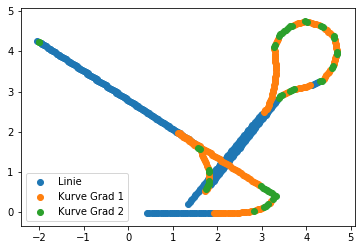

<Figure size 1440x720 with 0 Axes>

In [94]:
data = np.array(point_array_line)
data2 = np.array(point_array_turn)
data3 = np.array(point_array_turn2)
x,y = data.T
x2,y2 = data2.T
x3,y3 = data3.T
plt.scatter(x,y, label = "Linie")
plt.scatter(x2,y2, label = "Kurve Grad 1")
plt.scatter(x3,y3, label = "Kurve Grad 2")
plt.legend()
plt.figure(figsize=(20,10))
plt.show()

##### 

In [95]:
print(len(point_array_line))
print(len(point_array_turn))
print(len(point_array_turn2))

314
170
53


In [96]:
print(point_array_line)

[[0.42581896208263315, -0.02363120631841653], [0.47601360767160117, -0.02357366340296985], [0.5262082532605692, -0.02351612048752317], [0.5764028988495372, -0.023458577572076485], [0.6265975444385052, -0.023401034656629804], [0.6767921900274733, -0.023343491741183123], [0.7269868356164413, -0.023285948825736442], [0.7771814812054093, -0.02322840591028976], [0.8273761267943773, -0.02317086299484308], [0.8775707723833455, -0.023113320079396395], [0.9277654179723134, -0.023055777163949714], [0.9779600635612814, -0.022998234248503033], [1.0281547091502494, -0.022940691333056352], [1.0783493547392173, -0.02288314841760967], [1.1285440003281855, -0.02282560550216299], [1.1787386459171536, -0.022768062586716306], [1.2289332915061215, -0.022710519671269625], [1.2791279370950897, -0.022652976755822944], [1.3293225826840578, -0.022595433840376263], [1.3795172282730257, -0.022537890924929582], [1.4297118738619936, -0.022480348009482898], [1.4799065194509617, -0.022422805094036217], [1.53010116503

In [98]:
with open(directory + "/" + "A61points.yaml", "w") as file:
            yaml.dump(task, file)